In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/naive-bayes-gaussian/SP_II_MN.csv


This is a Gaussian Naive Bayes Machine Learning algorithm model that predict the number of Customer who churned from a given bank dataset.

NB: Customer churn is a business term used to describe the number of customers and the rate at which a company loses customers using their products and services or stop doing business with them entirely.

In [2]:
# import data
df = pd.read_csv('/kaggle/input/naive-bayes-gaussian/SP_II_MN.csv')

df.head()

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited
0,15634602,619,0,42,2,0.00,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,113931.57,1
3,15701354,699,0,39,1,0.00,2,93826.63,0
4,15737888,850,0,43,2,125510.82,1,79084.10,0


In [3]:
# check class balance
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [4]:
# Exploratory data Analysis
df['Loyalty'] = df['Authority'] / df['Age']
df.drop(['ID', 'Age', 'Authority'], axis=1, inplace=True)
df.head()

,Score,Sex,Money,Product no,Balance (estimated),Exited,Loyalty
0,619,0,0.00,1,101348.88,1,0.047619
1,608,0,83807.86,1,112542.58,0,0.024390
2,502,0,159660.80,3,113931.57,1,0.190476
3,699,0,0.00,2,93826.63,0,0.025641
4,850,0,125510.82,1,79084.10,0,0.046512


In [5]:
# Split Data
Y = df['Exited']
X = df.copy()
X = X.drop('Exited', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

In [6]:
# Scale the model due to Prediction, Recall and F1 score being ill defined
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Build Model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [8]:
# Evaluation metrics of the model

print('Accuracy:', '%.3f' % accuracy_score(Y_test, Y_pred))
print('Precision:', '%.3f' % precision_score(Y_test, Y_pred))
print('Recall:', '%.3f' % recall_score(Y_test, Y_pred))
print('F1 score:', '%.3f' % f1_score(Y_test, Y_pred))

Accuracy: 0.820
Precision: 0.941
Recall: 0.126
F1 score: 0.222


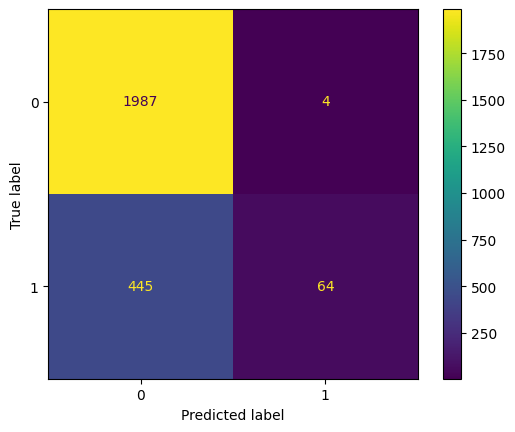

In [9]:
# Confusion matrix

import matplotlib.pyplot as plt

def conf_matrix_plot(model, X_data, Y_data):
    model_pred = model.predict(X_data)
    cm = confusion_matrix(Y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()
    plt.show()
    
conf_matrix_plot(gnb, X_test, Y_test)
    